# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [125]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [94]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [95]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | hastings
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | bukama
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | carupano
Processing Record 6 of Set 1 | whitehorse
Processing Record 7 of Set 1 | ayorou
Processing Record 8 of Set 1 | pandan
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | stanley
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | prado
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | kapuskasing
Processing Record 21 of Set 1 | remire-montjoly
Processing Record 22 of Set 1 | nar'yan-mar
Processing Record 23 of

In [96]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [97]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hastings,50.8552,0.5729,17.86,24,29,6.01,GB,1687737521
1,port-aux-francais,-49.3500,70.2167,1.98,99,100,13.48,TF,1687737521
2,bukama,-9.2000,25.8500,18.05,52,6,1.08,CD,1687737521
3,bethel,41.3712,-73.4140,26.47,77,6,1.73,US,1687737427
4,carupano,10.6678,-63.2585,26.38,85,14,4.33,VE,1687737521


In [98]:
# Export the City_Data into a csv
city_data_df.to_csv("../Starter_Code/output_data/cities.csv", index_label="City_ID")

In [91]:
# Read saved data
city_data_df = pd.read_csv("../Starter_Code/output_data/cities.csv")
# Display sample data
city_data_df.head()

,City_ID,City_ID.3,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,0,0,0,edinburgh of the seven seas,-37.0676,-12.3116,15.50,86,100,14.99,SH,1687735697
1,1,1,1,1,waitangi,-43.9535,-176.5597,12.68,82,99,4.47,NZ,1687735697
2,2,2,2,2,robertsport,6.7533,-11.3686,25.23,87,100,3.98,LR,1687735697
3,3,3,3,3,tiksi,71.6872,128.8694,6.53,71,61,3.02,RU,1687735697
4,4,4,4,4,holualoa,19.6228,-155.9522,26.91,73,40,5.14,US,1687735697


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

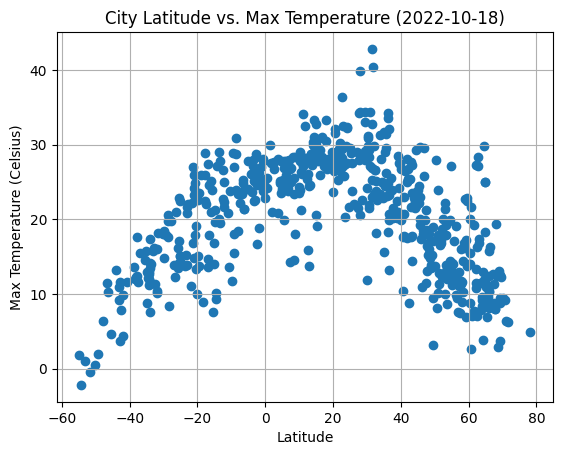

In [118]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Starter_Code/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

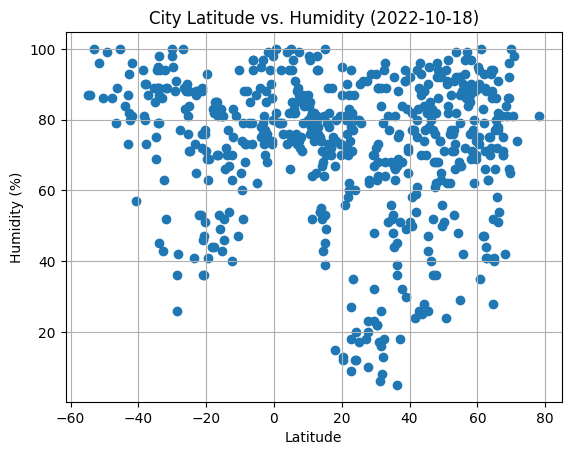

In [119]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Starter_Code/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

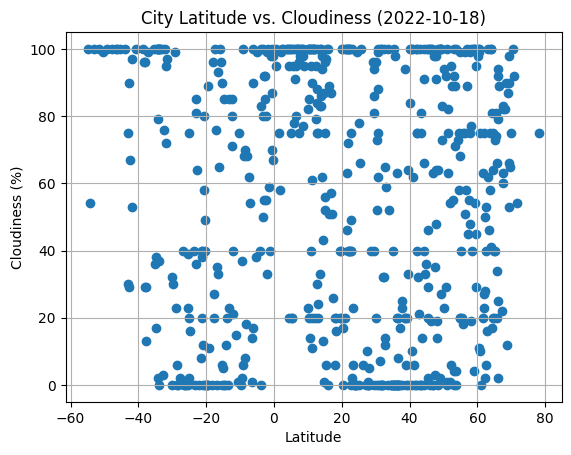

In [120]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Starter_Code/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

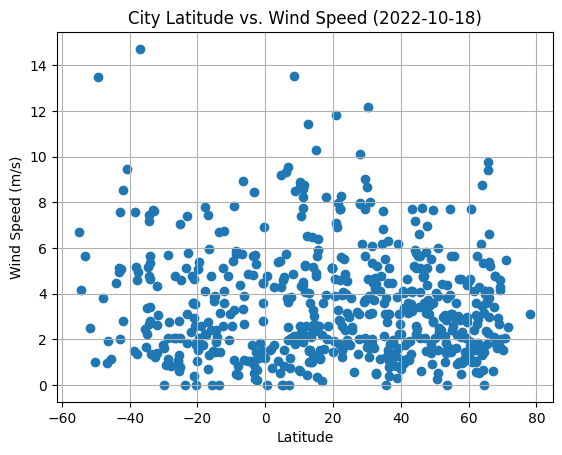

In [121]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Starter_Code/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [184]:
# Define a function to create Linear Regression plots
def lin_reg(x_values, y_values):
        (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values, "r-")
        print(line_eq)
        return lin_reg
        








In [164]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] > 0)]

# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,hastings,50.8552,0.5729,17.86,24,29,6.01,GB,1687737521
3,3,bethel,41.3712,-73.4140,26.47,77,6,1.73,US,1687737427
4,4,carupano,10.6678,-63.2585,26.38,85,14,4.33,VE,1687737521
5,5,whitehorse,60.7161,-135.0538,21.68,35,75,7.72,CA,1687737521
6,6,ayorou,14.7308,0.9174,27.99,64,87,2.35,NE,1687737522


In [165]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,1,port-aux-francais,-49.3500,70.2167,1.98,99,100,13.48,TF,1687737521
2,2,bukama,-9.2000,25.8500,18.05,52,6,1.08,CD,1687737521
8,8,punta arenas,-53.1500,-70.9167,1.06,100,100,5.66,CL,1687737522
9,9,ushuaia,-54.8000,-68.3000,1.81,87,100,6.69,AR,1687737522
10,10,hermanus,-34.4187,19.2345,12.67,89,100,7.17,ZA,1687737522


###  Temperature vs. Latitude Linear Regression Plot

y = -0.28x + 31.84


<function __main__.lin_reg(x_values, y_values)>

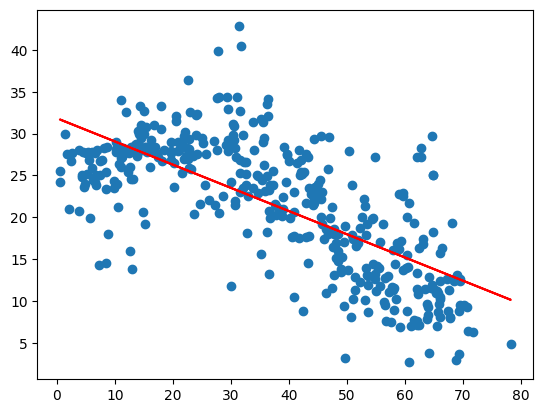

In [186]:
# Linear regression on Northern Hemisphere
result = lin_reg(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
result

y = 0.4x + 26.71


<function __main__.lin_reg(x_values, y_values)>

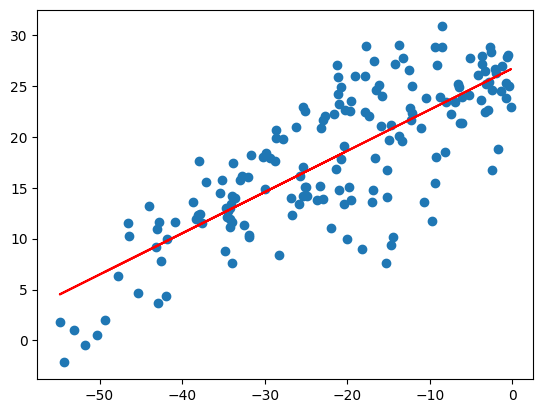

In [187]:
# Linear regression on Southern Hemisphere
result = lin_reg(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
result

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

y = 0.01x + 69.92


<function __main__.lin_reg(x_values, y_values)>

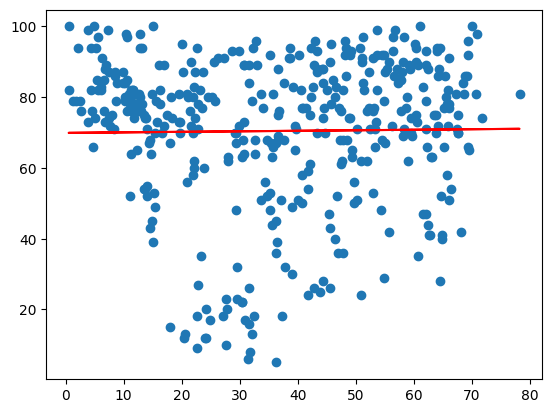

In [188]:
# Northern Hemisphere
result = lin_reg(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
result

y = -0.2x + 72.4


<function __main__.lin_reg(x_values, y_values)>

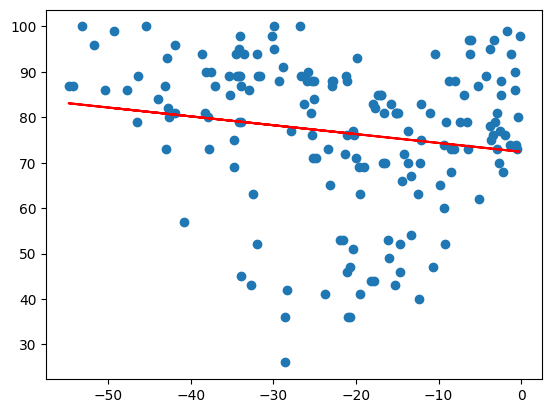

In [189]:
# Southern Hemisphere
result = lin_reg(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
result

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

y = -0.2x + 62.38


<function __main__.lin_reg(x_values, y_values)>

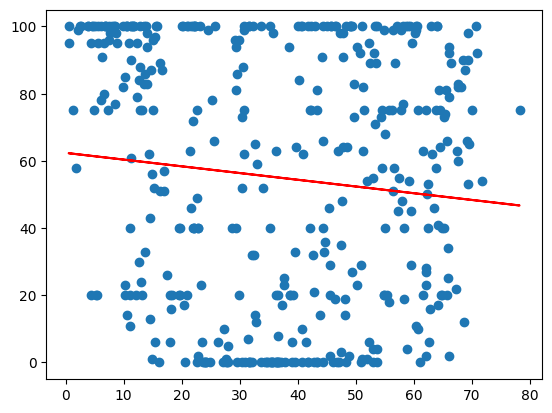

In [190]:
# Northern Hemisphere
result = lin_reg(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
result

y = -0.2x + 72.4


<function __main__.lin_reg(x_values, y_values)>

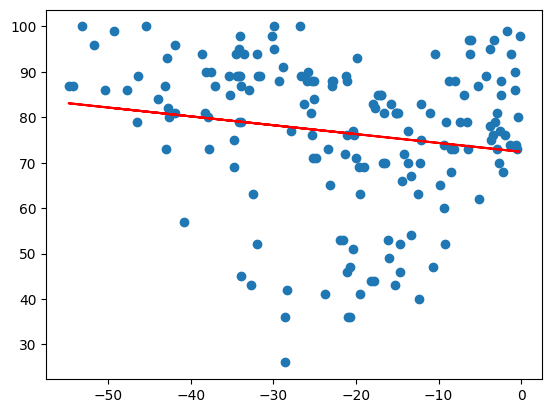

In [191]:
# Southern Hemisphere
result = lin_reg(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
result

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

y = -0.01x + 4.07


<function __main__.lin_reg(x_values, y_values)>

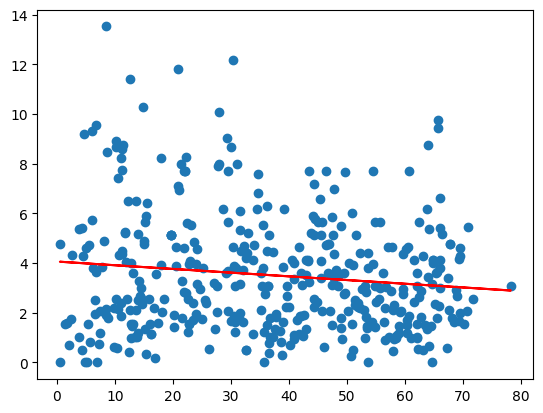

In [192]:
# Northern Hemisphere
result = lin_reg(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
result

y = -0.04x + 2.68


<function __main__.lin_reg(x_values, y_values)>

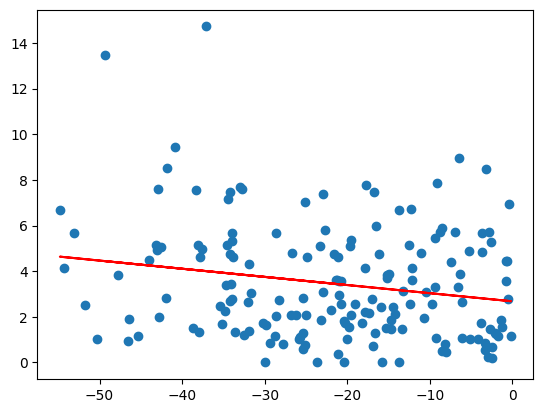

In [193]:
# Southern Hemisphere
result = lin_reg(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
result

**Discussion about the linear relationship:** YOUR RESPONSE HERE